# Final Description

Conduct a thorough analysis of a data set using statistical modeling techniques that we have learned in this class. I expect you to include a minimum of 5 of the major concepts that we have discussed in class this semester. Below is a listing of techniques you may choose from.



*   hypothesis testing
*   hypothesis testing with randomization
*   confidence intervals
*   bootstrapping
*   regression modeling
*   diagnostics of the model – goodness of fit, feature selection, residuals
*   t-tests
*   F-tests
*   Causal Inference
*   Bayesian networks
*   ANOVA
*   Model Selection – AIC, BIC, MSPE, R^2, Ra^2
*   Generalized Linear Modeling


You will be expected to show your work and process in a jupyter notebook. The last markdown cell should formally describe your results. You should think of the last markdown cell as writing a 1-2 page “paper”.  I expect 400-500 words.



Please see this description Download this descriptionfor full details including a grading rubric.

#Junsoo Jung _ Final project _ Stat 5010

## Dataset Explanation/Analysis/Cleaning

In [2]:
# Bunch of installments

#install.packages("lubridate")
#install.packages("car")
#install.packages("bnlearn")
#install.packages("BiocManager")
#install.packages("caret")
#install.packages("randomForest")
#install.packages("Metrics")
#BiocManager::install("Rgraphviz")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/l

In [3]:
# Library called

library(dplyr)
library(ggplot2)
library(lubridate)
library(car)
library(bnlearn)
library(caret)
library(nnet)
library(randomForest)
library(Metrics)
library(Rgraphviz)

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


Loading required package: lattice

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘Metrics’


The following objects are masked from ‘package:caret’:

    precision, recall


Loading required package: graph

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following object is masked from ‘package:randomForest’:

    combine


The following object is masked from ‘package:bnlearn’:

    score


The following objects are masked from ‘package:lubridate’:

    intersect, setdiff, union


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are maske

In [5]:
#Load dataset

df <- read.csv("AnimalShelter.csv")
#head(df)

In [6]:
# Look at the classes
sapply(df, class)

Animal_Id            Animal_Type           Animal_Breed 
           "character"            "character"            "character" 
         Kennel_Number          Kennel_Status               Tag_Type 
           "character"            "character"              "logical" 
       Activity_Number      Activity_Sequence              Source_Id 
           "character"              "integer"            "character" 
          Census_Tract       Council_District            Intake_Type 
             "integer"              "integer"            "character" 
        Intake_Subtype           Intake_Total                 Reason 
           "character"              "integer"            "character" 
              Staff_Id            Intake_Date            Intake_Time 
           "character"            "character"            "character" 
               Due_Out       Intake_Condition           Hold_Request 
           "character"            "character"            "character" 
          Outcome_Type        Outcome_Subtype           Outcome_Date 
           "character"            "character"            "character" 
          Outcome_Time         Receipt_Number         Impound_Number 
           "character"            "character"            "character" 
Service_Request_Number      Outcome_Condition            Chip_Status 
           "character"            "character"            "character" 
         Animal_Origin Additional_Information                  Month 
           "character"            "character"            "character" 
                  Year 
           "character"

In [7]:
# Check NAs
sapply(df, function(x) sum(is.na(x)))

Animal_Id            Animal_Type           Animal_Breed 
                     0                      0                      0 
         Kennel_Number          Kennel_Status               Tag_Type 
                     0                      0                  22350 
       Activity_Number      Activity_Sequence              Source_Id 
                     0                      0                      0 
          Census_Tract       Council_District            Intake_Type 
                  8800                   8800                      0 
        Intake_Subtype           Intake_Total                 Reason 
                     0                      0                      0 
              Staff_Id            Intake_Date            Intake_Time 
                     0                      0                      0 
               Due_Out       Intake_Condition           Hold_Request 
                     0                      0                      0 
          Outcome_Type        Outcome_Subtype           Outcome_Date 
                     0                      0                      0 
          Outcome_Time         Receipt_Number         Impound_Number 
                     0                      0                      0 
Service_Request_Number      Outcome_Condition            Chip_Status 
                     0                      0                      0 
         Animal_Origin Additional_Information                  Month 
                     0                      0                      0 
                  Year 
                     0

In [8]:
# drop columns because of the NA values
df <- subset(df, select = -c(Tag_Type,Census_Tract,Council_District))


I am going to analysis this dataset to know about what is the great factor of they could find new home or return to their owners. For that, I really care about the information of the animal's health, status, and such directly related to the animal.

This means, I do not want data about vaulenteer, data created time, or indexes. For example, 'Receipt_Number' or 'kennel_Number' are treated as index because they are unique value for almost every rows.

In [9]:
#drop Not necessary informations (such as additional information, receipt number, index, etc.)
df <- subset(df, select = -c(Service_Request_Number,Intake_Time,Outcome_Time,Activity_Number,Kennel_Number,Animal_Id,Receipt_Number,Impound_Number,Staff_Id,Additional_Information,Month,Year,Source_Id,Hold_Request,Activity_Sequence,Intake_Total))

In [10]:
# check is there any empty strings or NA string values.
sapply(df, function(x) {
  sum(is.na(x) | x == "" | x == "NA" | x == "UNKNOWN")
})

Animal_Type      Animal_Breed     Kennel_Status       Intake_Type 
                0                 9                 0                 0 
   Intake_Subtype            Reason       Intake_Date           Due_Out 
                0              2073                 0                 0 
 Intake_Condition      Outcome_Type   Outcome_Subtype      Outcome_Date 
                0                 0                 3              1600 
Outcome_Condition       Chip_Status     Animal_Origin 
             3378              2073              2073

In [11]:
# Remove rows with some empty things
missingvaluerow <- apply(df, 1, function(x) any(x == "" | x == "NA" | x == "UNKNOWN"))
df <- df[!missingvaluerow, ]

In [12]:
# Convert datatype as fitted.
df$Intake_Date <- mdy(df$Intake_Date)
df$Due_Out <- mdy(df$Due_Out)
df$Outcome_Date <- mdy(df$Outcome_Date)

In [13]:
#Change values as factor
cols <- c("Animal_Type","Kennel_Status", "Intake_Type", "Intake_Subtype",
                    "Outcome_Type", "Outcome_Subtype", "Intake_Condition",
                    "Outcome_Condition", "Chip_Status", "Animal_Origin","Reason")
df[cols] <- lapply(df[cols], factor)

In [14]:
# After cleaning the data
head(df)

,Animal_Type,Animal_Breed,Kennel_Status,Intake_Type,Intake_Subtype,Reason,Intake_Date,Due_Out,Intake_Condition,Outcome_Type,Outcome_Subtype,Outcome_Date,Outcome_Condition,Chip_Status,Animal_Origin
,<fct>,<chr>,<fct>,<fct>,<fct>,<fct>,<date>,<date>,<fct>,<fct>,<fct>,<date>,<fct>,<fct>,<fct>
1,DOG,PIT BULL,UNAVAILABLE,STRAY,CONFINED,OTHRINTAKS,2023-12-21,2023-12-25,APP WNL,TRANSFER,MEDICAL,2024-01-09,APP SICK,SCAN NO CHIP,FIELD
2,DOG,PIT BULL,AVAILABLE,TREATMENT,SPAY/NEUT,SURGERY,2024-02-19,2024-02-19,APP WNL,TREATMENT,COMPLETED,2024-02-19,APP WNL,SCAN CHIP,OVER THE COUNTER
3,DOG,GERM SHEPHERD,IMPOUNDED,OWNER SURRENDER,URGENT,OTHRINTAKS,2024-03-29,2024-04-02,APP INJ,EUTHANIZED,HUMANE,2024-03-29,APP INJ,SCAN CHIP,FIELD
4,DOG,GERM SHEPHERD,AVAILABLE,OWNER SURRENDER,APPOINT,PERSNLISSU,2023-12-15,2023-12-15,APP WNL,TRANSFER,GENERAL,2023-12-16,APP WNL,SCAN CHIP,OVER THE COUNTER
5,DOG,SHEPHERD,IMPOUNDED,OWNER SURRENDER,URGENT,MEDICAL,2024-02-07,2024-02-07,APP INJ,EUTHANIZED,MEDICAL,2024-02-07,APP SICK,SCAN CHIP,FIELD
6,DOG,AUST SHEPHERD,UNAVAILABLE,STRAY,CONFINED,OTHRINTAKS,2024-04-15,2024-04-21,APP INJ,RETURNED TO OWNER,WESTMORELD,2024-04-16,APP WNL,SCAN CHIP,FIELD


In [15]:
summary(df)

    Animal_Type    Animal_Breed           Kennel_Status           Intake_Type  
 BIRD     : 1048   Length:18890       AVAILABLE  :6126   STRAY          :8722  
 CAT      : 3756   Class :character   UNAVAILABLE:5056   FOSTER         :3152  
 DOG      :13364   Mode  :character   IMPOUNDED  :2576   OWNER SURRENDER:2902  
 LIVESTOCK:   10                      PENDING    :1865   CONFISCATED    :1507  
 WILDLIFE :  712                      LAB        :1654   TREATMENT      : 788  
                                      PRE-LAB    :1332   WILDLIFE       : 647  
                                      (Other)    : 281   (Other)        :1172  
  Intake_Subtype        Reason       Intake_Date            Due_Out          
 AT LARGE:6974   OTHRINTAKS:10829   Min.   :2023-10-01   Min.   :2023-10-01  
 APPOINT :4156   FOR ADOPT : 1672   1st Qu.:2023-11-24   1st Qu.:2023-11-27  
 CONFINED:1542   MEDICAL   : 1083   Median :2024-01-21   Median :2024-01-24  
 SAC     :1089   PERSNLISSU:  910   Mean   :2024

In [16]:
#Save cleaned data for in case.
write.csv(df, "CleandAnimalShelter.csv",row.names = FALSE)

After the cleaning the data, I removed 17 columns. But I still got 15 columns remaining.

## Analysing

In [40]:
df <- read.csv("CleandAnimalShelter.csv")


Let's say Chips can help top return to their owner.

H0 : Animal with chip has higher possibility to return their owner.\
Ha : chip does not matter.



In [18]:
summary(df$Outcome_Type)

   Length     Class      Mode 
    18890 character character 

In [19]:
#Pre-Process data and build Generalized Linear Modeling
df$Outcome_Type <- factor(df$Outcome_Type, levels = c("RETURNED TO OWNER", "OTHER"))
df$Returned_to_Owner <- ifelse(df$Outcome_Type == "RETURNED TO OWNER", 1, 0)
model <- glm(Returned_to_Owner ~ Chip_Status, family = binomial, data = df)
summary(model)

Warning message:
“glm.fit: algorithm did not converge”



Call:
glm(formula = Returned_to_Owner ~ Chip_Status, family = binomial, 
    data = df)

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)
(Intercept)                2.657e+01  1.108e+04   0.002    0.998
Chip_StatusSCAN NO CHIP   -7.604e-10  1.601e+04   0.000    1.000
Chip_StatusUNABLE TO SCAN -7.604e-10  2.717e+04   0.000    1.000

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 0.00e+00  on 2188  degrees of freedom
Residual deviance: 1.27e-08  on 2186  degrees of freedom
  (16701 observations deleted due to missingness)
AIC: 6

Number of Fisher Scoring iterations: 25


P-values are all way more higher than Alpha 0.05\
It is showing that animal with chips are not that helpful to owners to find them.

---

Because it is not that hopeful, I wanted to do see other factors that might be hopeful.

Let's say, this time how their condition matter to adopted.

H0: If they are healthy, they are highly adopted.\
Ha: helath does not matter

In [20]:
df <- read.csv("CleandAnimalShelter.csv")

In [21]:
#
#df$Binary_Outcome <- ifelse(df$Outcome_Type == "ADOPTION", 1, 0)
#df$Binary_Outcome

In [22]:
# Pre-Process data and build model
df$Binary_Outcome <- ifelse(df$Outcome_Type == "ADOPTION", 1, 0)
model1 <- glm(Binary_Outcome ~ Outcome_Condition, family = binomial, data = df)
summary(model1)


Call:
glm(formula = Binary_Outcome ~ Outcome_Condition, family = binomial, 
    data = df)

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 -3.61840    0.23884 -15.150  < 2e-16 ***
Outcome_ConditionAPP SICK   -0.03796    0.31318  -0.121  0.90353    
Outcome_ConditionAPP WNL     3.08836    0.23943  12.899  < 2e-16 ***
Outcome_ConditionCRITICAL   -1.74133    0.62606  -2.781  0.00541 ** 
Outcome_ConditionDECEASED   -2.03409    1.02983  -1.975  0.04825 *  
Outcome_ConditionFATAL      -8.94767  114.81448  -0.078  0.93788    
Outcome_ConditionGERIATRIC  -8.94767  324.74378  -0.028  0.97802    
Outcome_ConditionUNDERAGE   -3.28133    1.02862  -3.190  0.00142 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 23149  on 18889  degrees of freedom
Residual deviance: 20612  on 18882  degrees of freedom
AIC: 20628

Number of Fisher Scoring

In [23]:
# Run chi-squared test
table <- table(df$Outcome_Condition, df$Outcome_Type)
chi <- chisq.test(table)
chi

Warning message in chisq.test(table):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table
X-squared = 23932, df = 84, p-value < 2.2e-16


It seems like if they are healthy, the chance of adpotion is high. If I see the result, p-value of APP WNL(applicant with normal limits) is the only one extemely small. There seems to be higher adoption chance on healthy animals.

---

And now let's see how shelter life period is effected to their adoption chance.
Let's say if they stay longer in shelter, it is hard to get adopted.

H0 : Longer stays in the shelter negatively impact the likelihood of positive outcomes.\
Ha : it does not matter.


In [24]:
# Calculate time
df$Duration <- as.numeric(difftime(df$Outcome_Date, df$Intake_Date, units = "days"))
summary(df$Duration)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   3.000   6.555   9.000 178.000 

In [25]:
# Run t-test
t_test <- t.test(Duration ~ Binary_Outcome, data = df)
print(t_test)


	Welch Two Sample t-test

data:  Duration by Binary_Outcome
t = 6.2197, df = 12644, p-value = 5.138e-10
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 0.5754401 1.1050510
sample estimates:
mean in group 0 mean in group 1 
       6.808892        5.968646 



There is significantly and slightly difference between two groups. P-value is also less than 0.05. This means the animals who stay shorter has more chance to get adopted. The statistical significance tells us that the observed difference in the average duration between these two groups is unlikely to have occurred by random chance.

---

And then let's try Bayesian networks.


In [26]:
df <- read.csv("CleandAnimalShelter.csv")

In [27]:
# Pre-Process data
df <- subset(df, select = -c(Intake_Date,Due_Out,Outcome_Date))
cols <- c("Animal_Type","Animal_Breed","Kennel_Status", "Intake_Type", "Intake_Subtype",
                    "Outcome_Type", "Outcome_Subtype", "Intake_Condition",
                    "Outcome_Condition", "Chip_Status", "Animal_Origin","Reason")
df[cols] <- lapply(df[cols], factor)

In [28]:
head(df)

,Animal_Type,Animal_Breed,Kennel_Status,Intake_Type,Intake_Subtype,Reason,Intake_Condition,Outcome_Type,Outcome_Subtype,Outcome_Condition,Chip_Status,Animal_Origin
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,DOG,PIT BULL,UNAVAILABLE,STRAY,CONFINED,OTHRINTAKS,APP WNL,TRANSFER,MEDICAL,APP SICK,SCAN NO CHIP,FIELD
2,DOG,PIT BULL,AVAILABLE,TREATMENT,SPAY/NEUT,SURGERY,APP WNL,TREATMENT,COMPLETED,APP WNL,SCAN CHIP,OVER THE COUNTER
3,DOG,GERM SHEPHERD,IMPOUNDED,OWNER SURRENDER,URGENT,OTHRINTAKS,APP INJ,EUTHANIZED,HUMANE,APP INJ,SCAN CHIP,FIELD
4,DOG,GERM SHEPHERD,AVAILABLE,OWNER SURRENDER,APPOINT,PERSNLISSU,APP WNL,TRANSFER,GENERAL,APP WNL,SCAN CHIP,OVER THE COUNTER
5,DOG,SHEPHERD,IMPOUNDED,OWNER SURRENDER,URGENT,MEDICAL,APP INJ,EUTHANIZED,MEDICAL,APP SICK,SCAN CHIP,FIELD
6,DOG,AUST SHEPHERD,UNAVAILABLE,STRAY,CONFINED,OTHRINTAKS,APP INJ,RETURNED TO OWNER,WESTMORELD,APP WNL,SCAN CHIP,FIELD


In [29]:
bns <- hc(df, score = "bic")
fitbn <- bn.fit(bns, data = df)
cpquery(fitbn, event = (Outcome_Type == "ADOPTION"), evidence = (Animal_Type == "DOG"))

[1] 0.3234356

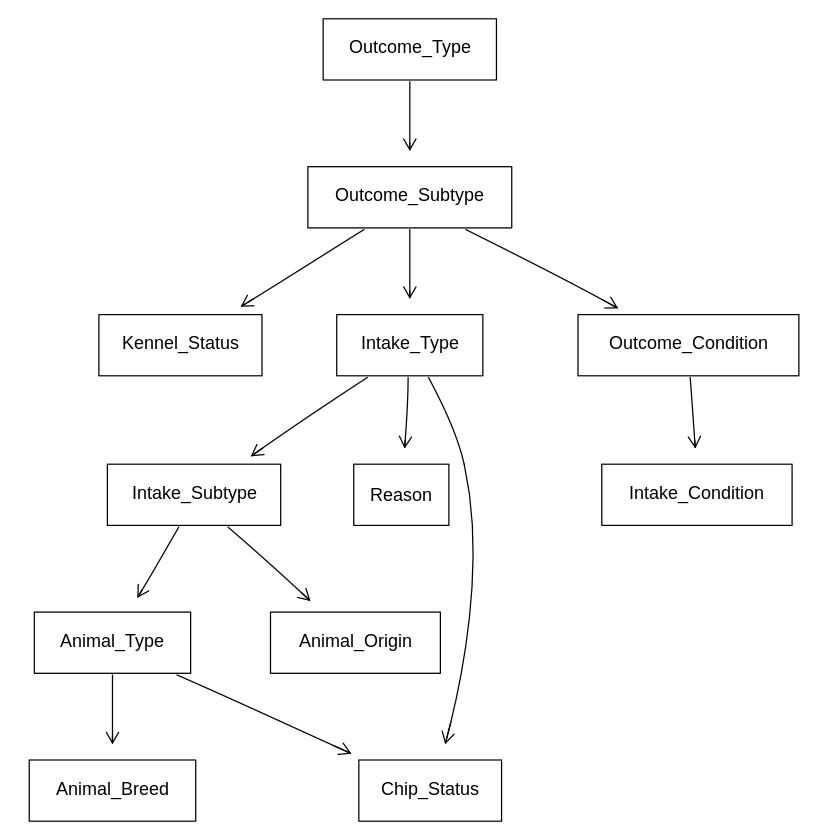

In [30]:
graphviz.plot(fitted_bn)

Mostly Outcome type is the main source which impacts start in this dataset.

---

Next thing I will try is Model Selection – AIC, BIC, MSPE, R^2, Ra^2

In [31]:
# Pre-Process data
df <- read.csv("CleandAnimalShelter.csv")
df <- subset(df, select = -c(Intake_Date,Due_Out,Outcome_Date))
cols <- c("Animal_Type","Kennel_Status", "Intake_Type", "Intake_Subtype",
                    "Outcome_Type", "Outcome_Subtype", "Intake_Condition",
                    "Outcome_Condition", "Chip_Status", "Animal_Origin","Reason")
df[cols] <- lapply(df[cols], factor)

In [32]:
# build train/test data (80%/20%)
trainsamples <- createDataPartition(df$Outcome_Type, p = 0.8, list = FALSE)
train <- df[trainsamples, ]
test <- df[-trainsamples, ]

In [33]:
# Because If I use all the datas, the model variable weights are way huge to analysis. So, I picked the most important things.
model <- multinom(Outcome_Type ~ Animal_Type + Intake_Condition, data = train)

# weights:  169 (144 variable)
initial  value 38779.469335 
iter  10 value 28836.800984
iter  20 value 25942.184494
iter  30 value 24841.297153
iter  40 value 24266.796138
iter  50 value 24013.553568
iter  60 value 23860.573808
iter  70 value 23803.645535
iter  80 value 23794.365647
iter  90 value 23792.625402
iter 100 value 23792.576792
final  value 23792.576792 
stopped after 100 iterations


In [38]:
# Calculate models.
aic <- AIC(model)
bic <- BIC(model)

predictions <- predict(model, test, type = "class")
mspe <- mse(test_data$Outcome_Type, predictions)

r2 <- summary(model)$r.squared
adjr2 <- summary(model)$adj.r.squared

Warning message in Ops.factor(actual, predicted):
“‘-’ not meaningful for factors”
Warning message in sqrt(diag(vc)):
“NaNs produced”
Warning message in sqrt(diag(vc)):
“NaNs produced”


In [39]:
# Results
aic
bic
mspe_value
r2
adjr2

[1] 47873.15

[1] 48970.97

[1] NA

NULL

NULL

Because my dataset is all categorical, It was impossible to calculate MSPE and R^2.

In [36]:
accuracy <- sum(predictions == test_data$Outcome_Type) / length(predictions)
cat("Accuracy:", accuracy, "\n")

Accuracy: 0.410236 


High AIC/BIC\
These values suggest that the model might not be the best fit for the data. It could be due to overfitting, where the model is too complex and is capturing noise instead of the underlying pattern.

Low Accuracy\
This might mean that this model has difficulty distinguishing between the classes in your outcome variable.
The features used may not be good predictors of the outcome.
The model might be too complex with high variance.
The classes are imbalanced, and the model is biased toward the majority class or there might be noise in the data.

## Report/Summary
In recent years, the plight of homeless animals has garnered increasing attention, compelling communities and individuals alike to take action. My personal interest in this issue stems from a profound commitment to animal welfare and a desire to see every pet housed in caring environment. This report focuses on the current state of animal shelters in Dallas, a city known for its large stray animal population and the community's robust efforts to manage it.

The city of Dallas has long grappled with challenges related to animal homelessness, spurred by factors such as economic disparity, lack of pet owner education, and insufficient spay and neuter practices. These issues not only affect animal welfare but also public health and community safety, making it a multifaceted problem requiring comprehensive solutions. This includes efforts like adoption programs, public education campaigns, and the enforcement of pet registration laws. But before I run those programs, I have to face what is the reality of animal shelters.

This dataset is pulled directly from Dallas Animal Services' Chameleon Database, which is used to track shelter and field operations, animal inventory and movement, animal intake and outcome, animal medical records, animal behavior observations, and animal microchip information. This dataset reflects data from October 1, 2021 to current-date. Data is subject to correction after the fact if data entry errors are detected or changes are made to fields within the database and therefore, data can have slight variances over time.

Before cleaning, this dataset has 34,800 rows and 33 columns. But because there are lots of index-like numbers, and null columns and rows. I had to clean it to process stastical analysis. After cleaning process, I got 18,890 rows and 15 columns. The remaining columns and description is like this.

*   Animal Type\
Animal category: dog, cat, wildlife, other, etc.

*   Animal Breed\
Breed of the animal; typically a visual breed estimation.

*   Kennel Status\
Availability of the animal.

*   Intake Type\
Type or purpose of intake; used primarily to analyze intake trends.

*   Intake Subtype\
Additional categorization of purpose of intake; used primarily to analyze intake trends.

*   Reason\
Reason the animal was surrendered or taken in.

*   Intake Date\
Date the animal was intaken by DAS.

*   Due Out\
Date the animal's stray hold expires and animal will be available for non-return to owner outcomes; date DAS has full ownership of the animal based on city ordinance.

*   Intake Condition\
Apparent medical condition of the animal when it was taken in by DAS.

*   Outcome Type\
Final outcome of the animal if they are no longer under the care of DAS at the time of the report.

*   Outcome Subtype\
Additional details on the outcome of the animal used primiarly for outcome trend analysis.

*   Outcome Date\
Date the animal was outcomed by DAS / left DAS' care.

*   Outcome Condition\
Apparent medical condition of the animal when it was released from DAS.

*   Chip Status\
Notates whether staff were successful in scanning animal for a microchip.

*   Animal Origin\
Notates whether the animal came in through DAS' Pet Support Lobby (Over the Counter) or through Field Services (Field).

And because all of the datas are categorial and datetime, it was limited to use stastical analysis.

The investigation into the factors affecting the outcomes of animals in a Dallas shelter presents a nuanced picture. Initially, the hypothesis that microchips increase the likelihood of animals being reunited with their owners was not supported by the data; p-values indicated that microchips may not significantly influence this outcome. This finding challenges common assumptions about the efficacy of microchipping in aiding lost pets' return.

Furthermore, the health of animals was significantly correlated with adoption rates. Animals presenting as healthy or with minor, treatable conditions were more likely to be adopted, as indicated by low p-values for these categories. This suggests that potential adopters may prioritize the perceived health of animals, perhaps due to concerns about medical costs or a desire for a 'problem-free' pet.

In contrast to expectations, the duration of an animal's stay at the shelter had a counterintuitive relationship with adoption likelihood. A shorter stay correlated with increased chances of adoption, dispelling the notion that longer shelter residence decreases an animal's prospects for finding a home.

The Bayesian network analysis further indicated that 'Outcome Type' was a primary driver in the dataset, although the high AIC/BIC values from the generalized linear models caution against overfitting and signal the complexity of the shelter environment. The adoption probability for dogs, when factoring in all variables, stood at approximately 32.73%, a figure that could serve as a benchmark for future improvements in shelter operations.

Despite the multifaceted insights gleaned, the model's overall accuracy was relatively low, suggesting that while certain patterns can be discerned, there remains a degree of unpredictability in animal shelter outcomes. This complexity underscores the multifaceted nature of animal welfare issues and suggests that there are more variables at play than those captured in the dataset.

In conclusion, while microchips and duration of stay are not as significant as once thought, the health of the animals and the intricacies of the shelter's operational dynamics play critical roles in the outcomes of sheltered animals. These findings should inform strategies that prioritize the health and rapid rehoming of animals to increase the likelihood of positive outcomes.